In [1]:
import math
import cv2 as cv
from matplotlib import pyplot as plt
plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

In [2]:
## load images 
img_names = ["objects.jpg", "playing_card_heart_A.png", "playing_card_spades_A.png"]
img_objects, img_heart, img_spades = (cv.imread(f"./img/{key}") for key in img_names)


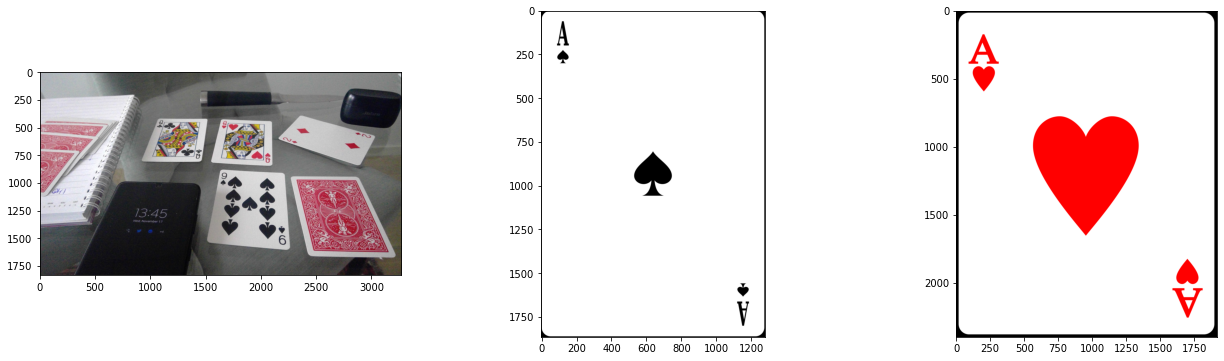

In [3]:
fig, ax = plt.subplots(1,3)

fig.set_size_inches(22,6)

ax[0].imshow(img_objects[:,:,::-1])
ax[1].imshow(img_spades[:,:,::-1])
ax[2].imshow(img_heart[:,:,::-1])

16

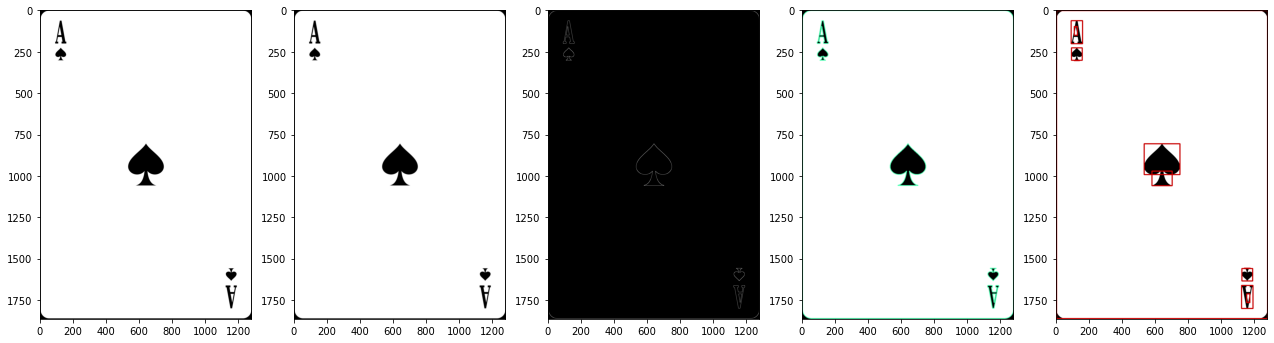

In [4]:
# SPADES 
# Work flow one
blur = cv.GaussianBlur(img_spades, (3, 3), 10)
canny = cv.Canny(blur, 100, 200)

contours, hierarchy = cv.findContours(canny, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
b = cv.drawContours(img_spades.copy(), contours, -1, (80, 255, 180), 3)

marked = img_spades.copy()
rects = [cv.boundingRect(cnt) for cnt in contours]
for x, y, w, h in rects:
    cv.rectangle(marked, (x, y), (x+w, y+h), (200,0,0), 5)

fig, ax = plt.subplots(1, 5)
fig.set_size_inches(22, 6)

ax[0].imshow(img_spades)
ax[1].imshow(blur)
ax[2].imshow(canny)
ax[3].imshow(b)
ax[4].imshow(marked)

len(contours)


15

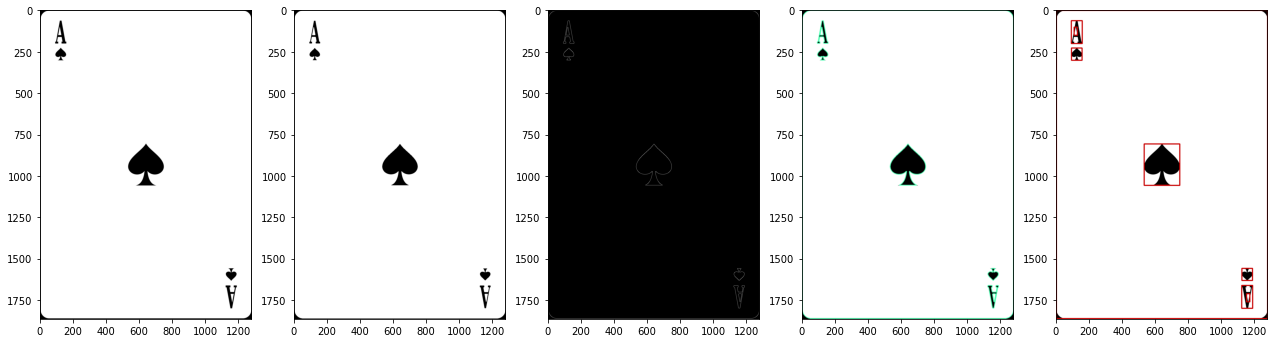

In [5]:
# SPADES 
# Work flow two

blur = cv.GaussianBlur(img_spades, (5, 5), 20)
_, bw = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
canny = cv.Canny(bw, 100, 200)

contours, hierarchy = cv.findContours(canny, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
b = cv.drawContours(img_spades.copy(), contours, -1, (80, 255, 180), 3)

marked = img_spades.copy()
rects = [cv.boundingRect(cnt) for cnt in contours]
for x, y, w, h in rects:
    cv.rectangle(marked, (x, y), (x+w, y+h), (200,0,0), 5)

fig, ax = plt.subplots(1, 5)
fig.set_size_inches(22, 6)

ax[0].imshow(img_spades)
ax[1].imshow(bw)
ax[2].imshow(canny)
ax[3].imshow(b)
ax[4].imshow(marked)

len(contours)


In [6]:
def get_shapes(image, canny_th1=100, canny_th2=200, blur_ksize=(5,5), blur_sigmax=20):
    blur = cv.GaussianBlur(image, blur_ksize, blur_sigmax)
    _, bw = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
    canny = cv.Canny(bw, canny_th1, canny_th2)
    contours, _ = cv.findContours(canny, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
    return [cv.boundingRect(cnt) for cnt in contours]


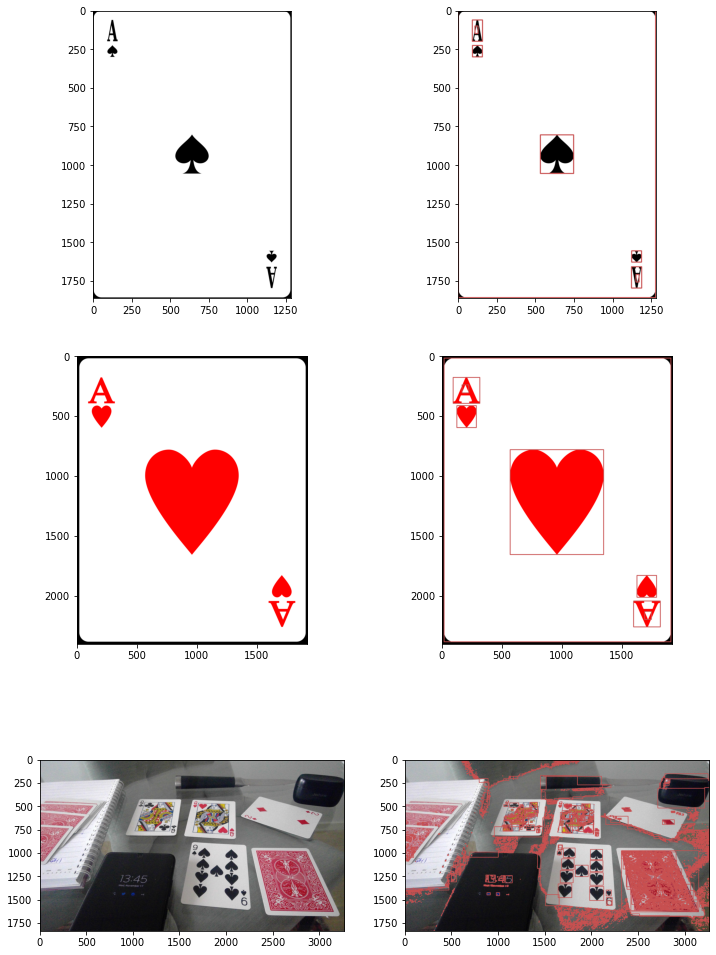

In [28]:

images = [img_spades, img_heart, img_objects]
fig, ax = plt.subplots(len(images), 2)
fig.set_size_inches(12, 6*len(images))
for ix, image in enumerate(images):
    marked = image.copy()
    rects = get_shapes(marked)
    for x, y, w, h in rects:
        cv.rectangle(marked, (x, y), (x+w, y+h), (80,80,200), 5)

    ax[ix, 0].imshow(image[:,:,::-1])
    ax[ix, 1].imshow(marked[:,:,::-1])



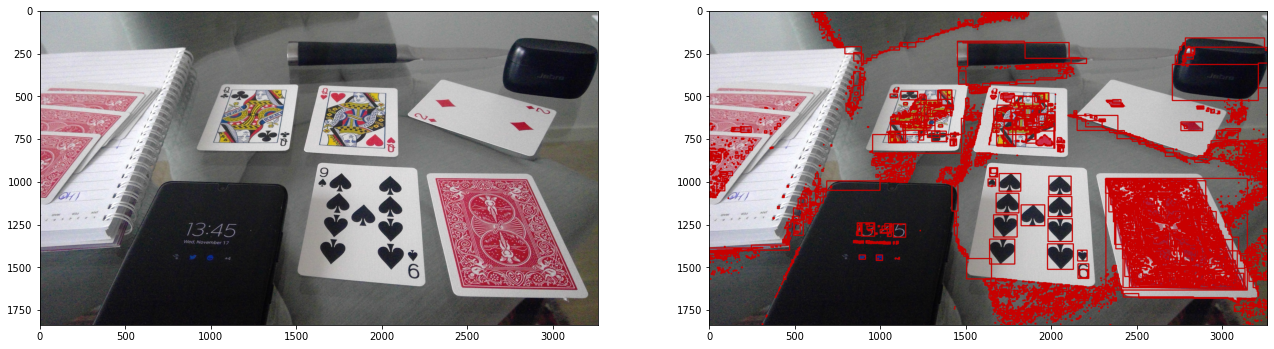

In [25]:
image = img_objects
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(22,6)
marked = image.copy()
rects = get_shapes(marked)
for x, y, w, h in rects:
    cv.rectangle(marked, (x, y), (x+w, y+h), (0,0,200), 5)

ax[0].imshow(image[:,:,::-1])
ax[1].imshow(marked[:,:,::-1])